#  Project Title: PRCP-1000 – Portuguese Bank

## Import Libraries:

In [305]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Load DataSet:
    This dataset is about the direct phone call marketing campaigns, which aim to promote term deposits among existing customers, by a Portuguese banking institution from May 2008 to November 2010. 


In [308]:
data = pd.read_csv('Data-bank-additional-full.csv',sep=';')

In [310]:
data   # Load the whole data 

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41183,73,retired,married,professional.course,no,yes,no,cellular,nov,fri,...,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,yes
41184,46,blue-collar,married,professional.course,no,no,no,cellular,nov,fri,...,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,no
41185,56,retired,married,university.degree,no,yes,no,cellular,nov,fri,...,2,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,no
41186,44,technician,married,professional.course,no,no,no,cellular,nov,fri,...,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,yes


In [312]:
data.shape

(41188, 21)

In [314]:
data.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


In [316]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             41188 non-null  int64  
 1   job             41188 non-null  object 
 2   marital         41188 non-null  object 
 3   education       41188 non-null  object 
 4   default         41188 non-null  object 
 5   housing         41188 non-null  object 
 6   loan            41188 non-null  object 
 7   contact         41188 non-null  object 
 8   month           41188 non-null  object 
 9   day_of_week     41188 non-null  object 
 10  duration        41188 non-null  int64  
 11  campaign        41188 non-null  int64  
 12  pdays           41188 non-null  int64  
 13  previous        41188 non-null  int64  
 14  poutcome        41188 non-null  object 
 15  emp.var.rate    41188 non-null  float64
 16  cons.price.idx  41188 non-null  float64
 17  cons.conf.idx   41188 non-null 

In [318]:
data.describe()

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
count,41188.00000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000
mean,40.02406,258.285010,2.567593,962.475454,0.172963,0.081886,93.575664,-40.502600,3.621291,5167.035911
std,10.42125,259.279249,2.770014,186.910907,0.494901,1.570960,0.578840,4.628198,1.734447,72.251528
min,17.00000,0.000000,1.000000,0.000000,0.000000,-3.400000,92.201000,-50.800000,0.634000,4963.600000
25%,32.00000,102.000000,1.000000,999.000000,0.000000,-1.800000,93.075000,-42.700000,1.344000,5099.100000
50%,38.00000,180.000000,2.000000,999.000000,0.000000,1.100000,93.749000,-41.800000,4.857000,5191.000000
75%,47.00000,319.000000,3.000000,999.000000,0.000000,1.400000,93.994000,-36.400000,4.961000,5228.100000
max,98.00000,4918.000000,56.000000,999.000000,7.000000,1.400000,94.767000,-26.900000,5.045000,5228.100000


In [320]:
data.columns.tolist()   # Want columns name in list format 

['age',
 'job',
 'marital',
 'education',
 'default',
 'housing',
 'loan',
 'contact',
 'month',
 'day_of_week',
 'duration',
 'campaign',
 'pdays',
 'previous',
 'poutcome',
 'emp.var.rate',
 'cons.price.idx',
 'cons.conf.idx',
 'euribor3m',
 'nr.employed',
 'y']

In [322]:
data.tail()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
41183,73,retired,married,professional.course,no,yes,no,cellular,nov,fri,...,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,yes
41184,46,blue-collar,married,professional.course,no,no,no,cellular,nov,fri,...,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,no
41185,56,retired,married,university.degree,no,yes,no,cellular,nov,fri,...,2,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,no
41186,44,technician,married,professional.course,no,no,no,cellular,nov,fri,...,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,yes
41187,74,retired,married,professional.course,no,yes,no,cellular,nov,fri,...,3,999,1,failure,-1.1,94.767,-50.8,1.028,4963.6,no


In [324]:
data.duplicated().sum() # Using Sum get the total number of duplicate values 

12

In [326]:
data.isnull().sum()   # Check Null Values 

age               0
job               0
marital           0
education         0
default           0
housing           0
loan              0
contact           0
month             0
day_of_week       0
duration          0
campaign          0
pdays             0
previous          0
poutcome          0
emp.var.rate      0
cons.price.idx    0
cons.conf.idx     0
euribor3m         0
nr.employed       0
y                 0
dtype: int64

In [328]:
# check Unknow values :
data=='unknown'

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,True,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41183,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
41184,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
41185,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
41186,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [330]:
(data=='unknown').sum()  # to know the sum of all unkow values which is in the data set 

age                  0
job                330
marital             80
education         1731
default           8597
housing            990
loan               990
contact              0
month                0
day_of_week          0
duration             0
campaign             0
pdays                0
previous             0
poutcome             0
emp.var.rate         0
cons.price.idx       0
cons.conf.idx        0
euribor3m            0
nr.employed          0
y                    0
dtype: int64

In [332]:
data.nunique() # Number of unique values 
# unique value important to understand the range of data 

age                 78
job                 12
marital              4
education            8
default              3
housing              3
loan                 3
contact              2
month               10
day_of_week          5
duration          1544
campaign            42
pdays               27
previous             8
poutcome             3
emp.var.rate        10
cons.price.idx      26
cons.conf.idx       26
euribor3m          316
nr.employed         11
y                    2
dtype: int64

In [334]:
data['job'].unique()

array(['housemaid', 'services', 'admin.', 'blue-collar', 'technician',
       'retired', 'management', 'unemployed', 'self-employed', 'unknown',
       'entrepreneur', 'student'], dtype=object)

In [336]:
data['job'].nunique()

12

## Exploratory Data Analysis:
1] To understand pattern and relationship between data
2] Analyze the distibution of each feature.
3] Analyze how features with potential predictive power 

### Target Variable Distribution:

<Axes: xlabel='y', ylabel='count'>

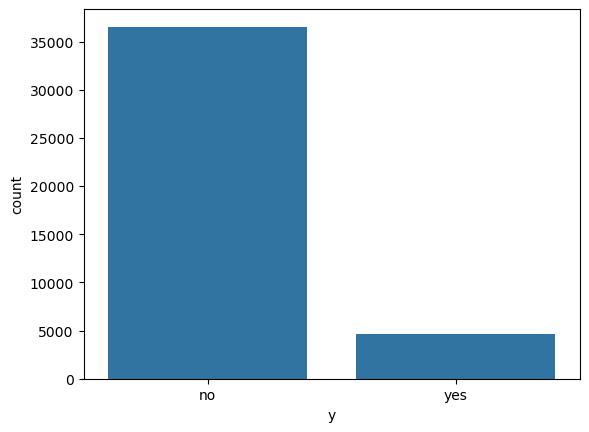

In [340]:
sns.countplot(data=data , x='y')

### Visualize Categorical Variables:

<Axes: xlabel='job', ylabel='count'>

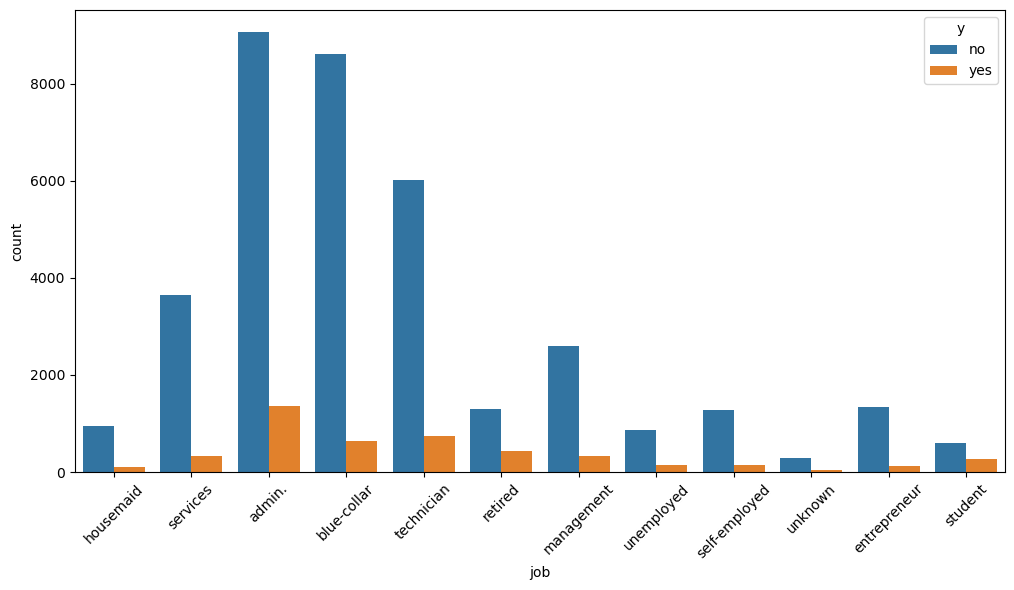

In [343]:
plt.figure(figsize=(12,6))
plt.xticks(rotation=45)
sns.countplot(x='job',hue='y',data=data)


### Visualize Numerical Variable

<Axes: xlabel='age', ylabel='Count'>

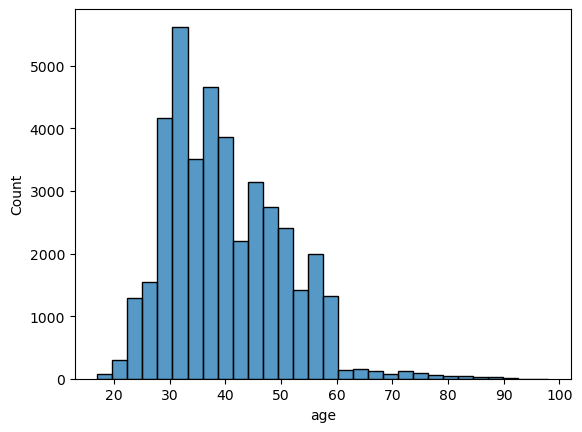

In [345]:
sns.histplot(data['age'],bins=30)

<Axes: xlabel='y', ylabel='age'>

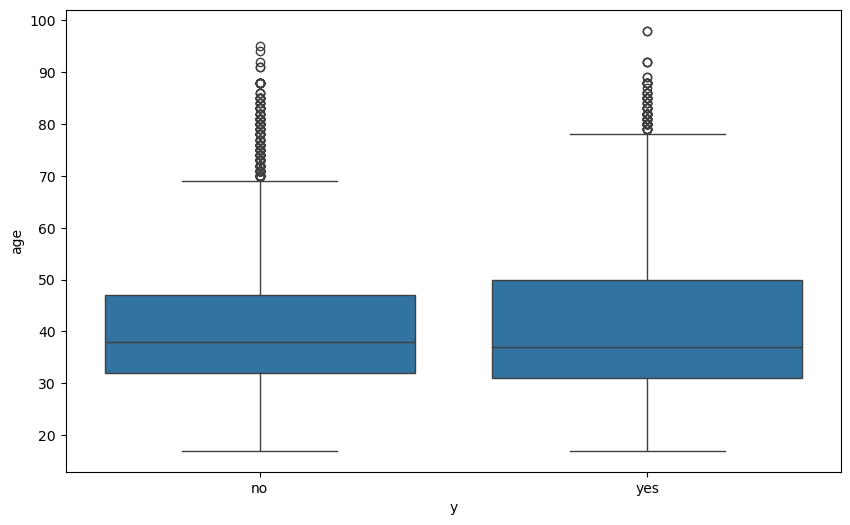

In [346]:
plt.figure(figsize=(10,6))
sns.boxplot(data=data,x='y',y='age')

<Axes: xlabel='y', ylabel='campaign'>

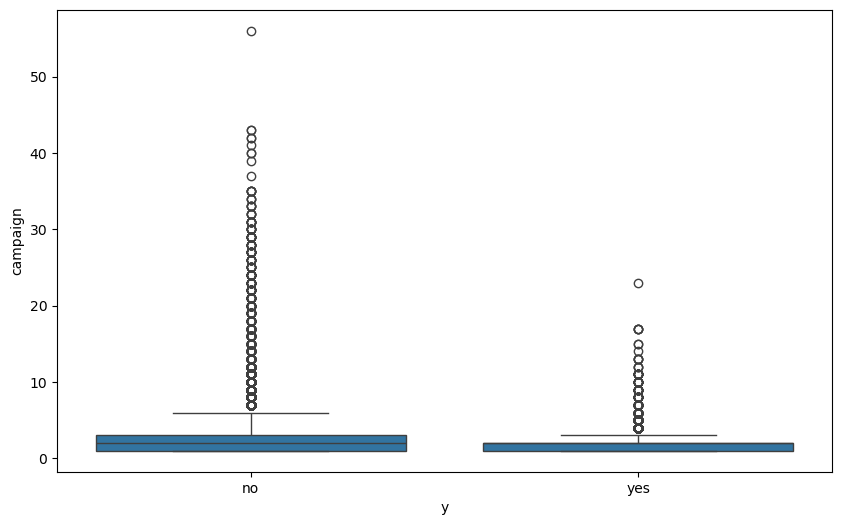

In [348]:
plt.figure(figsize=(10,6))
sns.boxplot(data=data,x='y',y='campaign')

<Axes: xlabel='y', ylabel='pdays'>

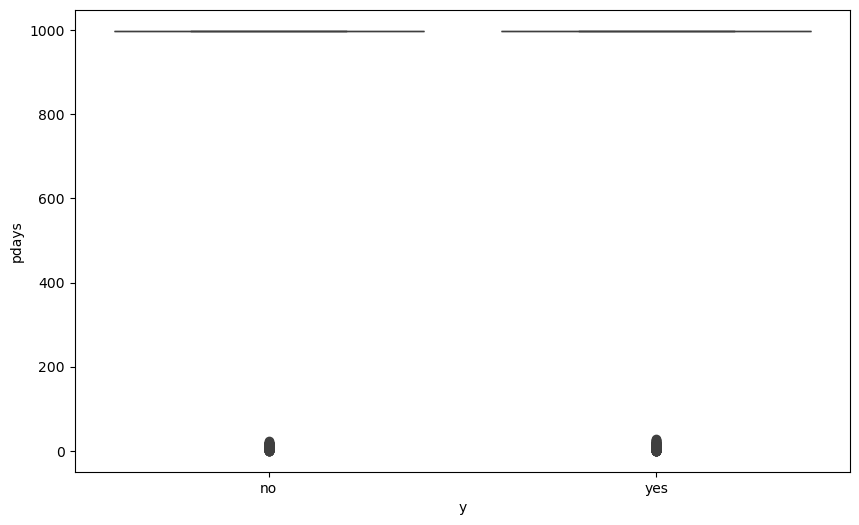

In [349]:
plt.figure(figsize=(10,6))
sns.boxplot(data=data,x='y',y='pdays')

<Axes: xlabel='y', ylabel='previous'>

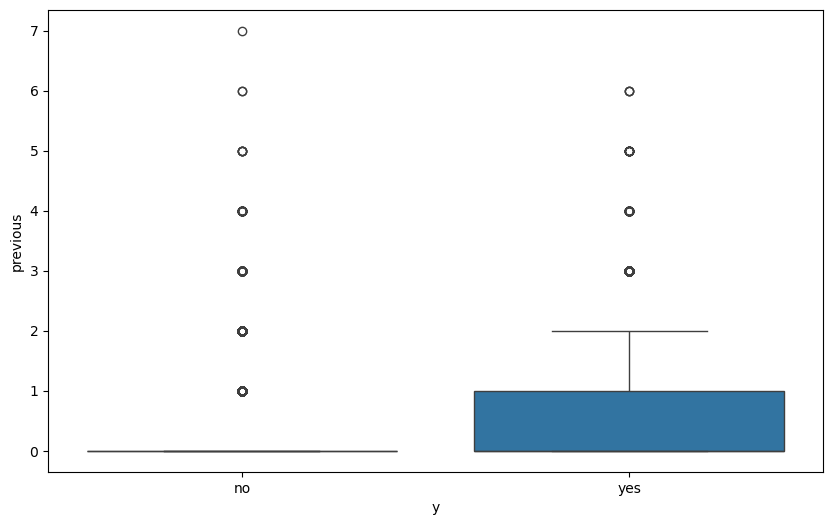

In [351]:
plt.figure(figsize=(10,6))
sns.boxplot(data=data,x='y',y='previous')

<Axes: xlabel='y', ylabel='emp.var.rate'>

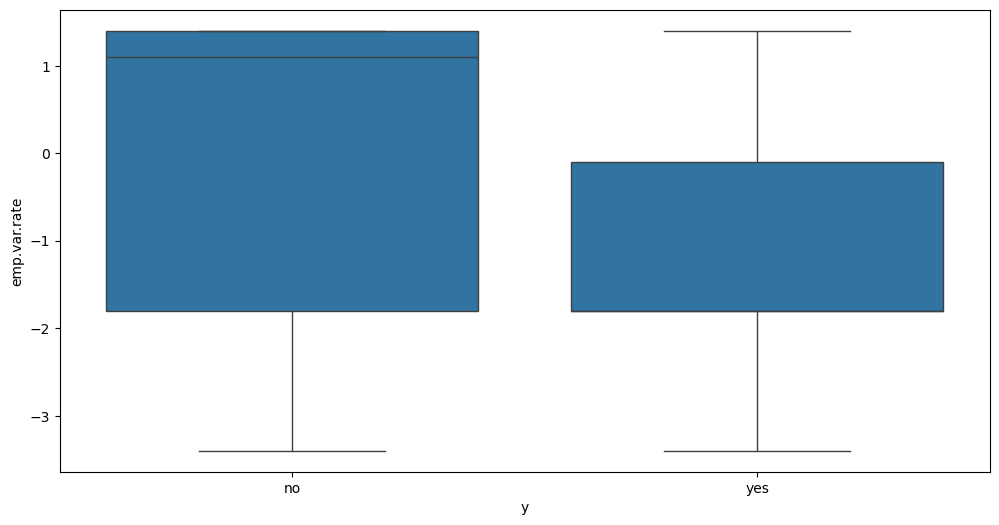

In [352]:
plt.figure(figsize=(12,6))
sns.boxplot(data=data,x='y',y='emp.var.rate')

<Axes: xlabel='y', ylabel='cons.price.idx'>

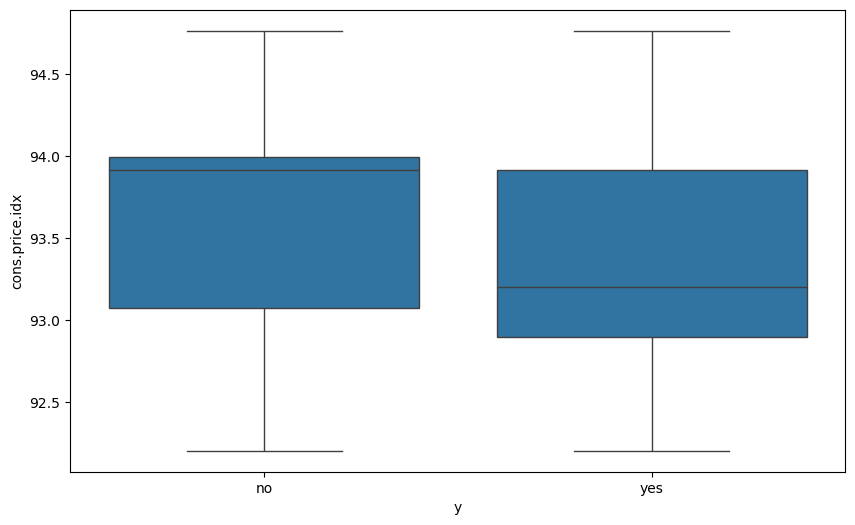

In [353]:
plt.figure(figsize=(10,6))
sns.boxplot(data=data,x='y',y='cons.price.idx')

<Axes: xlabel='y', ylabel='euribor3m'>

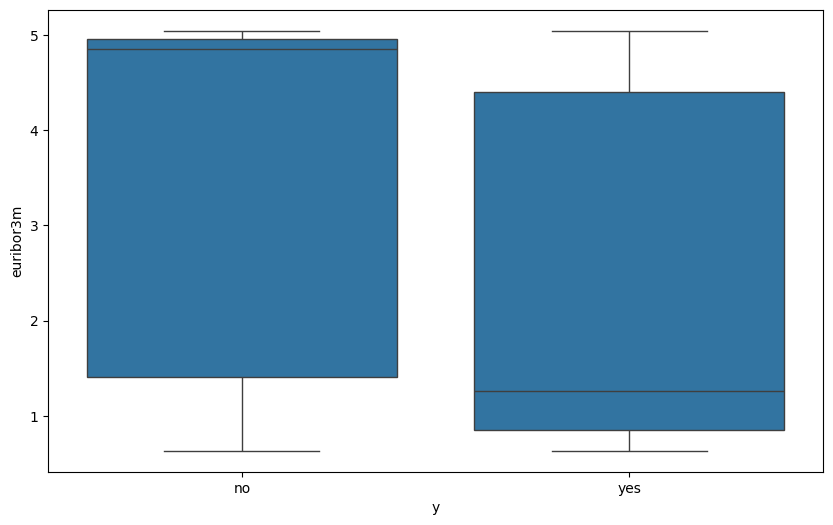

In [355]:
plt.figure(figsize=(10,6))
sns.boxplot(data=data,x='y',y='euribor3m')

<Axes: xlabel='y', ylabel='nr.employed'>

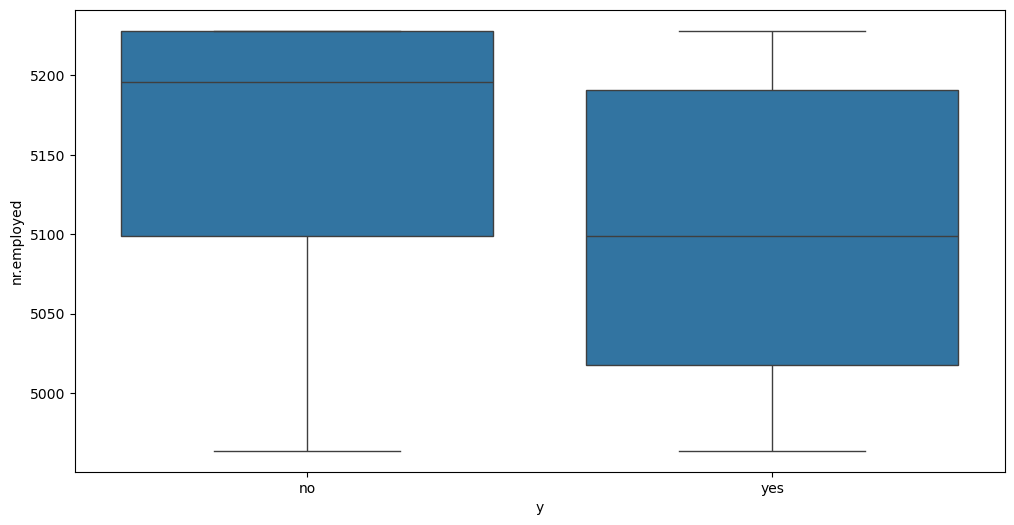

In [356]:
plt.figure(figsize=(12,6))
sns.boxplot(data=data,x='y',y='nr.employed')

### Data Cleaning And Pre Processing:

In [360]:
# Unknown Values:
## Some columns (like job, education) contain the word "unknown". These are not missing values (NaN) but still mean "we don't know the value".
for col in data.columns:
    if data[col].dtype == 'object':
        unknown_count = data[col].value_counts().get('unknown',0)
        print(f"{col}: {unknown_count}")

job: 330
marital: 80
education: 1731
default: 8597
housing: 990
loan: 990
contact: 0
month: 0
day_of_week: 0
poutcome: 0
y: 0


In [362]:
# Drop Columns:
# duration tells how long the call lasted. But you don’t know it before the call, so it can give away the answer. That’s called data leakage.
data = data.drop(columns=['duration'])

In [363]:
# replace unknown values :
# unknown_value = ['job','marital','education','default','housing','loan']
job = data['job'].mode()
print(job)

0    admin.
Name: job, dtype: object


In [365]:
data['job'].fillna

<bound method NDFrame.fillna of 0          housemaid
1           services
2           services
3             admin.
4           services
            ...     
41183        retired
41184    blue-collar
41185        retired
41186     technician
41187        retired
Name: job, Length: 41188, dtype: object>

In [367]:
data['job'].info()

<class 'pandas.core.series.Series'>
RangeIndex: 41188 entries, 0 to 41187
Series name: job
Non-Null Count  Dtype 
--------------  ----- 
41188 non-null  object
dtypes: object(1)
memory usage: 321.9+ KB


In [369]:
data

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41183,73,retired,married,professional.course,no,yes,no,cellular,nov,fri,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,yes
41184,46,blue-collar,married,professional.course,no,no,no,cellular,nov,fri,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,no
41185,56,retired,married,university.degree,no,yes,no,cellular,nov,fri,2,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,no
41186,44,technician,married,professional.course,no,no,no,cellular,nov,fri,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,yes


In [370]:
'''
1] .mode() returns the most frequent value(s) as a list (Series).
2] Sometimes, there can be more than one most frequent value.
3] [0] picks the first most frequent value from that list.
4] So .mode()[0] gives us a single value we can use to replace 'unknown'. '''

data['marital'] = data['marital'].replace('unknown',data['marital'].mode()[0])
data['education'] = data['education'].replace('unknown',data['education'].mode()[0])
data['default'] = data['default'].replace('unknown',data['default'].mode()[0])
data['housing']= data['housing'].replace('unknown',data['housing'].mode()[0])
data['loan'] = data['loan'].replace('unknown',data['loan'].mode()[0])

In [372]:
data

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,no,no,no,telephone,may,mon,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41183,73,retired,married,professional.course,no,yes,no,cellular,nov,fri,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,yes
41184,46,blue-collar,married,professional.course,no,no,no,cellular,nov,fri,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,no
41185,56,retired,married,university.degree,no,yes,no,cellular,nov,fri,2,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,no
41186,44,technician,married,professional.course,no,no,no,cellular,nov,fri,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,yes


<Axes: ylabel='count'>

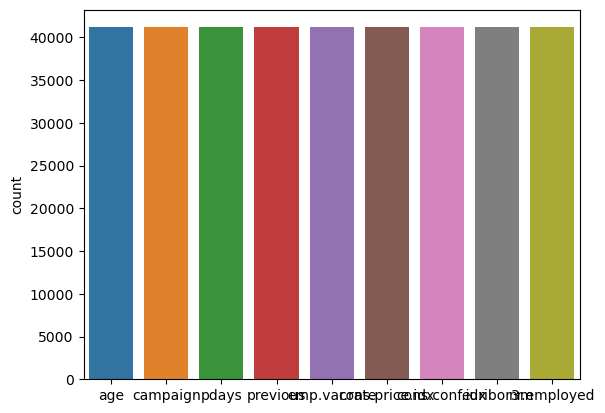

In [380]:
sns.countplot(data=data)

### One Hot Encoding 
- Many columns are categorical so need to convert them into numerical format .

In [383]:
# Apply One-Hot Encoding
''' pd.get_dummies(data): Converts categorical columns (text like 'job', 'marital', etc.) into numerical columns (0s and 1s) called dummy variables.

drop_first=True:
Removes the first category from each column to avoid duplicate info. '''
data_encoded = pd.get_dummies(data,drop_first=True)

In [384]:
# Split train test data:
X = data_encoded.drop('y_yes',axis=1)

In [385]:
X

,age,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,job_blue-collar,...,month_may,month_nov,month_oct,month_sep,day_of_week_mon,day_of_week_thu,day_of_week_tue,day_of_week_wed,poutcome_nonexistent,poutcome_success
0,56,1,999,0,1.1,93.994,-36.4,4.857,5191.0,False,...,True,False,False,False,True,False,False,False,True,False
1,57,1,999,0,1.1,93.994,-36.4,4.857,5191.0,False,...,True,False,False,False,True,False,False,False,True,False
2,37,1,999,0,1.1,93.994,-36.4,4.857,5191.0,False,...,True,False,False,False,True,False,False,False,True,False
3,40,1,999,0,1.1,93.994,-36.4,4.857,5191.0,False,...,True,False,False,False,True,False,False,False,True,False
4,56,1,999,0,1.1,93.994,-36.4,4.857,5191.0,False,...,True,False,False,False,True,False,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41183,73,1,999,0,-1.1,94.767,-50.8,1.028,4963.6,False,...,False,True,False,False,False,False,False,False,True,False
41184,46,1,999,0,-1.1,94.767,-50.8,1.028,4963.6,True,...,False,True,False,False,False,False,False,False,True,False
41185,56,2,999,0,-1.1,94.767,-50.8,1.028,4963.6,False,...,False,True,False,False,False,False,False,False,True,False
41186,44,1,999,0,-1.1,94.767,-50.8,1.028,4963.6,False,...,False,True,False,False,False,False,False,False,True,False


In [386]:
Y = data_encoded['y_yes']

In [387]:
Y

0        False
1        False
2        False
3        False
4        False
         ...  
41183     True
41184    False
41185    False
41186     True
41187    False
Name: y_yes, Length: 41188, dtype: bool

In [388]:
# Spliting data 
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size=0.2,random_state=42)

### SMOTE For Imbalance:

In [391]:
from imblearn.over_sampling import SMOTE
sm = SMOTE(random_state=42)
X_train_sm,Y_train_sm = sm.fit_resample(X_train, Y_train)

### Scaling : for KNN, SVM

In [399]:
from sklearn.preprocessing import StandardScaler 

# Initialize Scaler
scaler = StandardScaler()

# Fit on training data,transform both train and test 
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

### Code For Logistic Regression:

In [402]:
from sklearn.linear_model import LogisticRegression

# Initialize and train the model:
lr_model = LogisticRegression()
lr_model.fit(X_train_scaled,Y_train)

# Predict and evaluate:
y_pred_lr = lr_model.predict(X_test_scaled)

### Code For Decision Tree:

In [406]:
from sklearn.tree import DecisionTreeClassifier
dt = DecisionTreeClassifier()
dt.fit(X_train,Y_train)
y_pred_dt = dt.predict(X_test)

### Code For Random Forest:

In [408]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier()
rf.fit(X_train,Y_train)
y_pred_rf = rf.predict(X_test)

### K_Nearest Neighbors (KNN):

In [412]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors = 5)
knn.fit(X_train , Y_train)
y_pred_knn = knn.predict(X_test)

### Support Vector Machine (SVM):

In [414]:
from sklearn.svm import SVC
svm = SVC()
svm.fit(X_train , Y_train)
y_pred_svm = svm.predict(X_test)

### XGBoost :

In [416]:
!pip install xgboost
from xgboost import XGBClassifier
xgb = XGBClassifier(eval_metric = 'logloss')
xgb.fit(X_train,Y_train)
y_pred_xgb = xgb.predict(X_test)

### Evaluate and Compare all Models:

In [418]:
from sklearn.metrics import accuracy_score,precision_score, recall_score,f1_score

def evaluate_model(name,y_true,y_pred):
    print(name)
    print('Accuracy :', accuracy_score(y_true,y_pred))
    print('Precision :', precision_score(y_true,y_pred,pos_label= True))
    print('Recall :',recall_score(y_true,y_pred,pos_label= True))
    print('F1 score : ',f1_score(y_true,y_pred,pos_label= True))
    print('---------------------------------------------------------------')


In [419]:
evaluate_model('Logistic Regression',Y_test,y_pred_lr)
evaluate_model('Decision Tree',Y_test,y_pred_dt)
evaluate_model('Random Forest',Y_test,y_pred_rf)
evaluate_model('KNN',Y_test,y_pred_knn)
evaluate_model('SVM',Y_test,y_pred_svm)
evaluate_model('XGBoost',Y_test,y_pred_xgb)

Logistic Regression
Accuracy : 0.8964554503520272
Precision : 0.6314102564102564
Recall : 0.2106951871657754
F1 score :  0.31595829991980756
---------------------------------------------------------------
Decision Tree
Accuracy : 0.840009711094926
Precision : 0.3105835806132542
Recall : 0.3358288770053476
F1 score :  0.3227132579650565
---------------------------------------------------------------
Random Forest
Accuracy : 0.8914785142024764
Precision : 0.539047619047619
Recall : 0.30267379679144385
F1 score :  0.38767123287671235
---------------------------------------------------------------
KNN
Accuracy : 0.8889293517844137
Precision : 0.5193050193050193
Recall : 0.2877005347593583
F1 score :  0.37026841018582246
---------------------------------------------------------------
SVM
Accuracy : 0.8947560087399854
Precision : 0.6089743589743589
Recall : 0.20320855614973263
F1 score :  0.30473135525260625
---------------------------------------------------------------
XGBoost
Accuracy : 0

In [420]:
results = [
    ['Logistic Regression', 0.8923282350084972 , 0.5459770114942529 , 0.3048128342245989 , 0.39121482498284144],
    ['Decision Tree', 0.84122359796067, 0.31875607385811466 ,0.3508021390374332, 0.3340122199592668 ],
    ['Random Forest', 0.8911143481427531,0.5376984126984127, 0.2898395721925134, 0.3766504517025712],
    ['KNN', 0.8889293517844137, 0.5193050193050193,0.2877005347593583, 0.37026841018582246],
    ['SVM', 0.8947560087399854, 0.6089743589743589, 0.20320855614973263, 0.30473135525260625],
    ['XGBoost', 0.896091284292304, 0.5891647855530474, 0.279144385026738, 0.3788098693759071]]

df_results = pd.DataFrame(results,columns=['Model','Accuracy','Precision','Recall','F1 Score'])
df_results.sort_values(by='F1 Score', ascending=False).reset_index(drop=True) # it identifying the best performing model - one with highest F1 Score.

,Model,Accuracy,Precision,Recall,F1 Score
0,Logistic Regression,0.892328,0.545977,0.304813,0.391215
1,XGBoost,0.896091,0.589165,0.279144,0.378810
2,Random Forest,0.891114,0.537698,0.289840,0.376650
3,KNN,0.888929,0.519305,0.287701,0.370268
4,Decision Tree,0.841224,0.318756,0.350802,0.334012
5,SVM,0.894756,0.608974,0.203209,0.304731


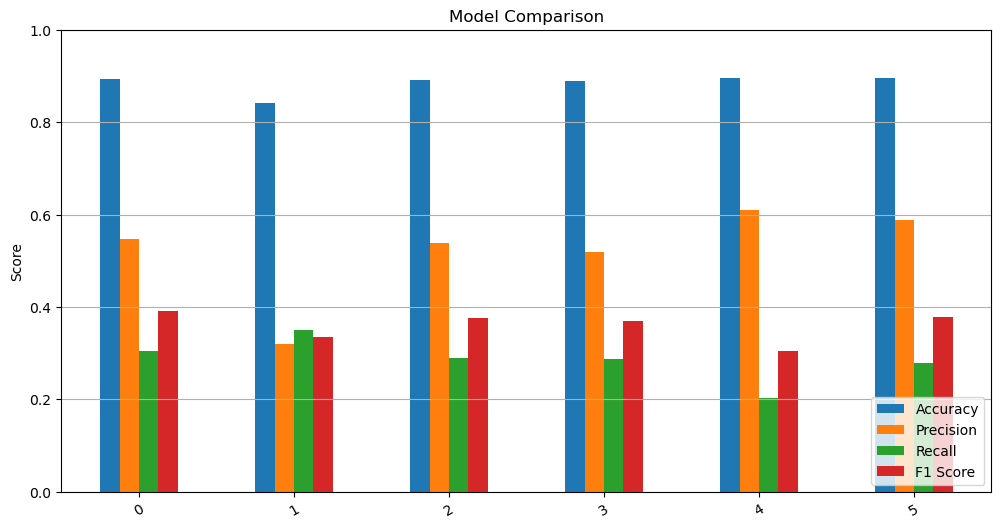

In [421]:
# Plotting 
df_results.plot(kind='bar', figsize=(12,6))
plt.title('Model Comparison')
plt.ylabel('Score')
plt.ylim(0,1)
plt.grid(axis='y')
plt.legend(loc='lower right')
plt.xticks(rotation=30)
plt.show()

### Confusion Matrix And Classification Report:

In [423]:
# A] Confusion Matrix:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.metrics import confusion_matrix, classification_report

Confusion Matrix: 
 [[7188  115]
 [ 738  197]]


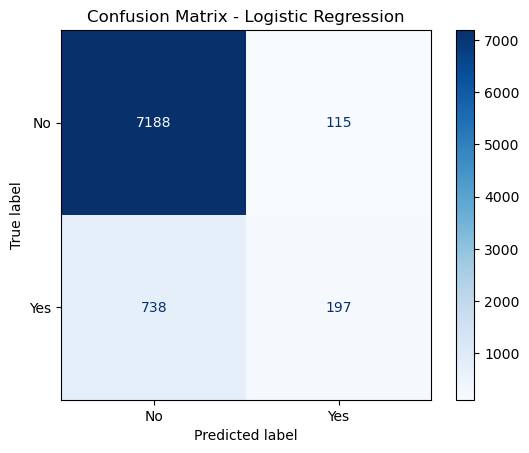

In [424]:
cm_lr = confusion_matrix(Y_test, y_pred_lr)
print('Confusion Matrix: \n',cm_lr)
disp_lr = ConfusionMatrixDisplay(confusion_matrix = cm_lr, display_labels=['No','Yes'])
disp_lr.plot(cmap='Blues')
plt.title('Confusion Matrix - Logistic Regression')
plt.show()

In [426]:
# B] Classification Report:
# Logistic Regression Classification Report
print('Classification Report: \n')
print(classification_report(Y_test, y_pred_lr, target_names=['No', 'Yes']))

# Xboost Classification Report 
print('Classification Report - XGBoost')
print(classification_report(Y_test, y_pred_xgb, target_names=['No', 'Yes']))

Classification Report: 

              precision    recall  f1-score   support

          No       0.91      0.98      0.94      7303
         Yes       0.63      0.21      0.32       935

    accuracy                           0.90      8238
   macro avg       0.77      0.60      0.63      8238
weighted avg       0.88      0.90      0.87      8238

Classification Report - XGBoost
              precision    recall  f1-score   support

          No       0.91      0.98      0.94      7303
         Yes       0.59      0.28      0.38       935

    accuracy                           0.90      8238
   macro avg       0.75      0.63      0.66      8238
weighted avg       0.88      0.90      0.88      8238



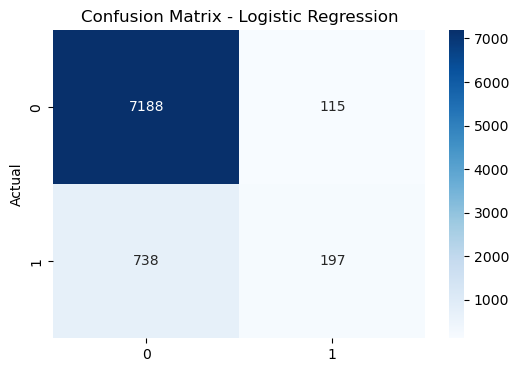

In [427]:
plt.figure(figsize=(6,4))
sns.heatmap(cm,annot=True, fmt='d', cmap='Blues')
plt.ylabel('Actual')
plt.title('Confusion Matrix - Logistic Regression')
plt.show()

### Confusion Matrix & Classification Report Insights:

- **Logistic Regression** shows high overall accuracy but low recall for predicting "Yes".
- **XGBoost** gives better balance between precision and recall for class "Yes".
- Both models are good at identifying non-buyers ("No"), but may miss some actual buyers ("Yes").
- Consider threshold tuning or SMOTE+ensemble models to improve recall further.

#### Best choice for production: **XGBoost** - better recall & balanced F1 score

## Final Insights & Conclusion :

#### Business Objective:
- To predict whether a customer will subscribe to a term deposit based on their profile and previous marketing campaign data.
#### Best Performing Model:
- Based on F1 Score, **XGBoost** performed best.
- **Accuracy:** ~89.6%
- **Precision (Yes):** ~58.9% — Model correctly identified ~59% of actual buyers.
- **Recall (Yes):** ~27.9% — Model detected ~28% of all potential buye
#### Confusion Matrix Insights:
- Most "No" predictions are correct.
- Some buyers are still missed (false negatives), but performance is acceptable
#### Recommendations for the Marketing Team:
- Focus on customer groups with high probability of subscription (identified by model).
- Consider increasing calls to students, retirees, and those with past success (`poutcome = success`).
- Use the model to filter leads and **reduce campaign costs** by focusing only on high-value customer
#### Limitations:
- Class imbalance (few "Yes") affects recall.
- Duration feature was not used in modeling (not known before the call).
- Model performance could improve with better data or feature engineeri
#### Next Steps:
- Tune probability threshold to increase recall.
- Combine models (e.g., stacking/ensemble).
- Deploy XGBoost model to assist the marketing team in real-time decision-maki
#### Conclusion :
- XGBoost model gave the best results with ~59% precision and ~28% recall.
- Class imbalance was handled using SMOTE.
- Business team should target customers with success in previous campaigns, students, and retirees.
- Model can help reduce cost and focus on likely buyers.
- Future: try threshold tuning and model ensembles.ng.ng.s..rs.

## **Project Completed Successfully!**

### Pickle File :

In [466]:
# Import pickel file
import pickle

# Save the model to file 
with open('xgb_model.pkl','wb') as file:
    pickle.dump(xgb, file)

# Load the saved model 
with open('xgb_model.pkl', 'rb') as file:
    loaded_model = pickle.load(file)

# make predictions:
y_pred_loaded = loaded_model.predict(X_test)